In [1]:
import numpy as np
import nibabel as nb
import pandas as pd
import scipy.io
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
Run1Seconds = np.array([i for i in range(819, 900+1)])
Run2Seconds = np.array([i for i in range(1737, 1818+1)])
Run3Seconds = np.array([i for i in range(2652, 2733+1)])
Run4Seconds = np.array([i for i in range(3553, 3634+1)])

In [3]:
RunSeconds = np.array([Run1Seconds, Run2Seconds, Run3Seconds, Run4Seconds])

In [4]:
file_path = 'E:/FPP_files_and_codes/FPP_files/relabeled_seconds/corrected_GPT_labeling/final_labels.csv'

RelabelDataframe = pd.read_csv(file_path)

In [5]:
RelabelDataframe

,prv_label,new_label
0,NaN,NaN
1,abdomen,Body
2,airliner,Object
3,airplane,Object
4,animal,Animal
...,...,...
595,woman,Body
596,work,Unclear
597,workshop,Place
598,wristband,Object


In [6]:
RelabelDictionary = {}
for index, row in RelabelDataframe.iterrows():
    if index != 0:
        RelabelDictionary[row['prv_label']] = row['new_label']
RelabelDictionary[''] = float('nan')

In [7]:
labels_list_1 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie1_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_1.append(labels)
labels_list_2 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie2_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_2.append(labels)
labels_list_3 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie3_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_3.append(labels)
labels_list_4 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie4_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_4.append(labels)
labels_list = labels_list_1 + labels_list_2 + labels_list_3  + labels_list_4
print(len(labels_list))

3655


In [8]:
RelabeldFrames = [set() for i in range(3655)]
for i in range(3655):
    for j in labels_list[i]:
        RelabeldFrames[i].add(str(RelabelDictionary[j]))

In [9]:
RunsWithoutFB = np.empty(4, dtype=object)
for i in range(4):
    RunsWithoutFB[i] = []
for i in range(4):
    for j in RunSeconds[i]:
        if ('Face' not in RelabeldFrames[j]) and ('Body' not in RelabeldFrames[j]) and ('Animal' not in RelabeldFrames[j]):
            RunsWithoutFB[i].append(j)

In [10]:
PreferedSeconds = np.array([np.array(RunsWithoutFB[i]) for i in range(4)])

In [11]:
PreferedSeconds.shape

(4, 29)

In [12]:
delay = 4
ShiftedPreferedSeconds = (PreferedSeconds + delay)%3655

In [13]:
ShiftedPreferedSeconds

array([[ 823,  824,  825,  826,  827,  828,  829,  830,  831,  832,  833,
         834,  835,  836,  837,  838,  839,  853,  854,  875,  876,  881,
         882,  883,  888,  889,  890,  895,  896],
       [1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751,
        1752, 1753, 1754, 1755, 1756, 1757, 1771, 1772, 1793, 1794, 1799,
        1800, 1801, 1806, 1807, 1808, 1813, 1814],
       [2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666,
        2667, 2668, 2669, 2670, 2671, 2672, 2686, 2687, 2708, 2709, 2714,
        2715, 2716, 2721, 2722, 2723, 2728, 2729],
       [3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567,
        3568, 3569, 3570, 3571, 3572, 3573, 3587, 3588, 3609, 3610, 3615,
        3616, 3617, 3622, 3623, 3624, 3629, 3630]], dtype=int32)

In [14]:
left_movie_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_left_Meanfile.mat')['Left_data']
right_movie_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_right_Meanfile.mat')['Right_data']

In [15]:
left_movie_data.shape

(32492, 3655)

In [15]:
FPPs_right = (nb.load('E:/FPP_files_and_codes/FPP_files/FPPs_combined/FPPs.rh.func.gii').darrays[0].data).T
FPPs_left = (nb.load('E:/FPP_files_and_codes/FPP_files/FPPs_combined/FPPs.lh.func.gii').darrays[0].data).T
right_FPPs_indices = [np.nonzero(FPPs_right[i]) for i in range(5)]
left_FPPs_indices = [np.nonzero(FPPs_left[i]) for i in range(5)]

In [16]:
Mean_activity_each_FPP_in_each_run = np.zeros((5,4))
SEM_each_FPP_in_each_run = np.zeros((5,4))

for FPP in range(5):
    for run in range(4):
        Activity_each_vertices_in_each_run = np.concatenate((right_movie_data[right_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[run]], left_movie_data[left_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[run]]))
        Mean_activity_FPP_in_each_second_of_run = np.mean(Activity_each_vertices_in_each_run, axis=0)
        Mean_activity_FPP_in_each_run = np.mean(Mean_activity_FPP_in_each_second_of_run)
        Mean_activity_each_FPP_in_each_run[FPP, run] = Mean_activity_FPP_in_each_run
        SEM_each_FPP_in_each_run[FPP,run] = stats.sem(Mean_activity_FPP_in_each_second_of_run)

In [17]:
Mean_activity_each_FPP_in_each_run

array([[0.06903589, 0.07114626, 0.01832419, 0.05866088],
       [0.10691905, 0.1839698 , 0.12314774, 0.14454909],
       [0.10795955, 0.26737724, 0.21559423, 0.26795417],
       [0.08465093, 0.28059275, 0.24270357, 0.31258815],
       [0.13732913, 0.31127071, 0.24218545, 0.27772396]])

In [18]:
max_vals = []
min_vals = []
for i in range(5):
    max_vals.append(max(Mean_activity_each_FPP_in_each_run[i] + SEM_each_FPP_in_each_run[i]))
    min_vals.append(min(Mean_activity_each_FPP_in_each_run[i] - SEM_each_FPP_in_each_run[i]))

y_min = min(min_vals)-0.01
y_max = max(max_vals)+0.01

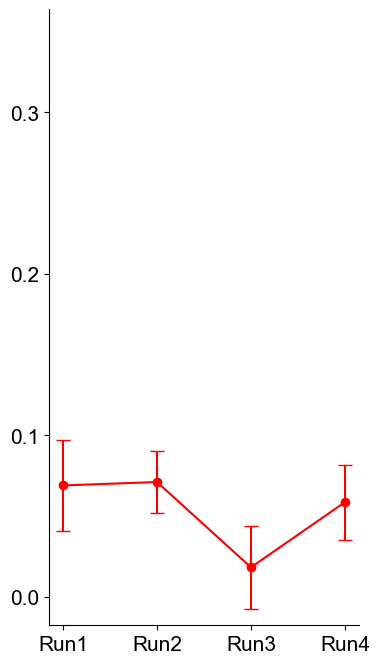

In [34]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[0], yerr=SEM_each_FPP_in_each_run[0],capsize=5, fmt='-o', color=colors[0])
# plt.title('FPP1')
plt.xticks([1,2,3,4], ['Run1', 'Run2', 'Run3', 'Run4'])
# plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('E:/FPP_files_and_codes/Figures/Figure5_files/panel_C/activity_FPP1_in_each_run.png', dpi=1200, bbox_inches='tight')
plt.show()

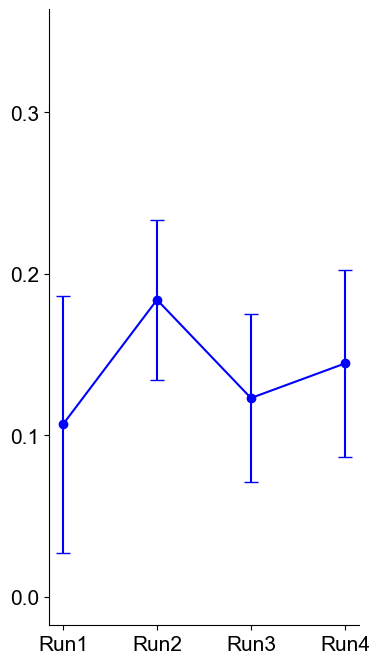

In [35]:

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[1], yerr=SEM_each_FPP_in_each_run[1],capsize=5, fmt='-o', color=colors[1])
# plt.title('FPP2')
plt.xticks([1,2,3,4], ['Run1', 'Run2', 'Run3', 'Run4'])
# plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('E:/FPP_files_and_codes/Figures/Figure5_files/panel_C/activity_FPP2_in_each_run.png', dpi=1200, bbox_inches='tight')
plt.show()

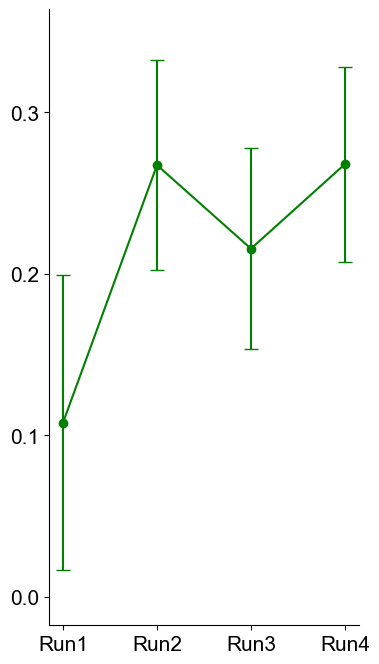

In [36]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[2], yerr=SEM_each_FPP_in_each_run[2],capsize=5, fmt='-o', color=colors[2])
# plt.title('FPP3')
plt.xticks([1,2,3,4], ['Run1', 'Run2', 'Run3', 'Run4'])
# plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('E:/FPP_files_and_codes/Figures/Figure5_files/panel_C/activity_FPP3_in_each_run.png', dpi=1200, bbox_inches='tight')
plt.show()

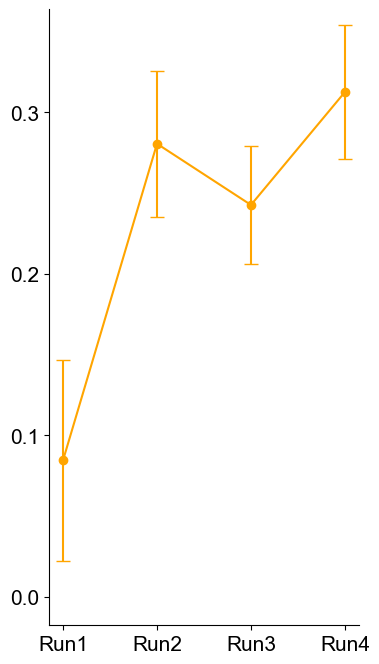

In [37]:

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[3], yerr=SEM_each_FPP_in_each_run[3],capsize=5, fmt='-o', color=colors[3])
# plt.title('FPP4')
plt.xticks([1,2,3,4], ['Run1', 'Run2', 'Run3', 'Run4'])

# plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('E:/FPP_files_and_codes/Figures/Figure5_files/panel_C/activity_FPP4_in_each_run.png', dpi=1200, bbox_inches='tight')
plt.show()

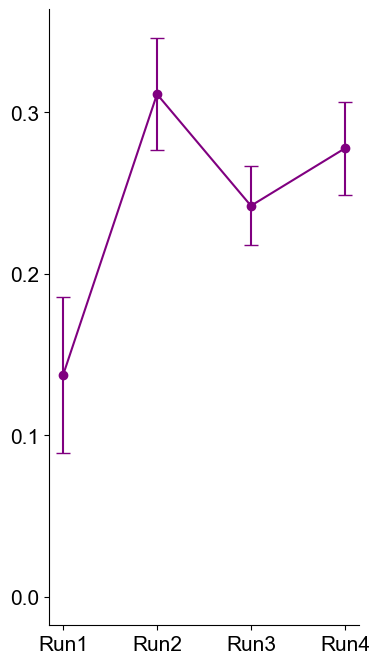

In [38]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[4], yerr=SEM_each_FPP_in_each_run[4],capsize=5, fmt='-o', color=colors[4])
# plt.title('FPP5')
plt.xticks([1,2,3,4], ['Run1', 'Run2', 'Run3', 'Run4'])

# plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('E:/FPP_files_and_codes/Figures/Figure5_files/panel_C/activity_FPP5_in_each_run.png', dpi=1200, bbox_inches='tight')
plt.show()